# <b>Image Recognition project</b>
<i> by MARTIN Erwan </i>

The goal of this project is to build a model able to do image recognition. For example, if I give the model a cat image, the output should be "cat"

In order to do that, we need first to transform our images into an understandable format for our model.

## <b>Image representation</b>

### <b><i>What is a pixel ?</i></b>

Before talking about images, we have to understand what is a pixel.

A pixel (short for "picture element") is the smallest unit of an image.
There are several way to represented a pixel :
- Grayscale : Viewing the image as shades of black and white. Each pixel is an integer between 0–255, where 0 is completely black and 255 is completely white.
- RGB : Each pixel is made up of 3 integers between 0–255, where the integers represent the intensity of red, green, and blue, respectively, for the pixel
- RGBA : Same as RGB, we just add an integer <i> alpha </i> which will represents the opacity : 0 => fully transparent 255 => fully opaque

### <i><b>Image structure</b></i>

Images are represented by a set of pixels. They are distributed in a plane (space of dimension 2) whose axes are named "height" and "width".

<img src="img/img1.png" alt="alt text" width="700" height="500">

## <b>Presentation of the dataset</b>

### <i><b>First gen Pokémon</i></b>

<img src="img/img3.png" alt="alt text" width="600" height="217">

<p>The dataset is composed of multiple images of the 151 Pokémon of the first génération.</p>

<p>Each Pokémon name is a class so we have 151 classes.</p>

<p>The goal here is the following one : Based on a image, find the pokémon name.</p>

## <b>Classification using neural networks</b>

### <i><b>How does it works?</i></b>

First of all, it is important to know that for image recognition problems, we use a certain type of neural network: CNNs

<img src="img/img2.png" alt="alt text" width="800" height="500">

As we can see, the neural network is divided in two separate parts :
- Feature Extraction : Part of the network which will extracts the specific features of the image (<b>Convolution Layers</b>) and summarizes them (<b>Pooling Layers</b>)
- Classification : Use the output of the first part of the neural network to predict the class

The goal here is to train the neural network using a training set of images with their classes to tune all the hyperparamters and achieve the best possible predictions

### <i><b>Data Preparation</i></b>

#### Librairies import

In [1]:
import os
#import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


2023-05-23 18:32:22.502744: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-23 18:32:23.707859: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


#### Image recovery and conversion to RGB format

In [2]:
dir_path = os.getcwd()
img_height = 214
img_width = 214
batch_size = 16
data_path =  os.path.join(dir_path, "PokemonData")

In [3]:

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6882 files belonging to 152 classes.
Using 5506 files for training.


2023-05-23 18:32:34.260539: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [4]:

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6882 files belonging to 152 classes.
Using 1376 files for validation.


In [5]:
class_names1 = train_ds.class_names
print(class_names1)

['Abra', 'Aerodactyl', 'Alakazam', 'Alolan Sandslash', 'Arbok', 'Arcanine', 'Articuno', 'Beedrill', 'Bellsprout', 'Blastoise', 'Bulbasaur', 'Butterfree', 'Caterpie', 'Chansey', 'Charizard', 'Charmander', 'Charmeleon', 'Clefable', 'Clefairy', 'Cloyster', 'Cubone', 'Dewgong', 'Diglett', 'Ditto', 'Dodrio', 'Doduo', 'Dragonair', 'Dragonite', 'Dratini', 'Drowzee', 'Dugtrio', 'Eevee', 'Ekans', 'Electabuzz', 'Electrode', 'Exeggcute', 'Exeggutor', 'Farfetchd', 'Fearow', 'Flareon', 'Gastly', 'Gengar', 'Geodude', 'Gloom', 'Golbat', 'Goldeen', 'Golduck', 'Golem', 'Graveler', 'Grimer', 'Growlithe', 'Gyarados', 'Haunter', 'Hitmonchan', 'Hitmonlee', 'Horsea', 'Hypno', 'Ivysaur', 'Jigglypuff', 'Jolteon', 'Jynx', 'Kabuto', 'Kabutops', 'Kadabra', 'Kakuna', 'Kangaskhan', 'Kingler', 'Koffing', 'Krabby', 'Lapras', 'Lickitung', 'Machamp', 'Machoke', 'Machop', 'Magikarp', 'Magmar', 'Magnemite', 'Magneton', 'Mankey', 'Marowak', 'Meowth', 'Metapod', 'Mew', 'Mewtwo', 'Moltres', 'MrMime', 'Muk', 'Nidoking', 'Ni

2023-05-22 17:49:03.197874: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [5506]
	 [[{{node Placeholder/_4}}]]
2023-05-22 17:49:03.201414: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [5506]
	 [[{{node Placeholder/_4}}]]


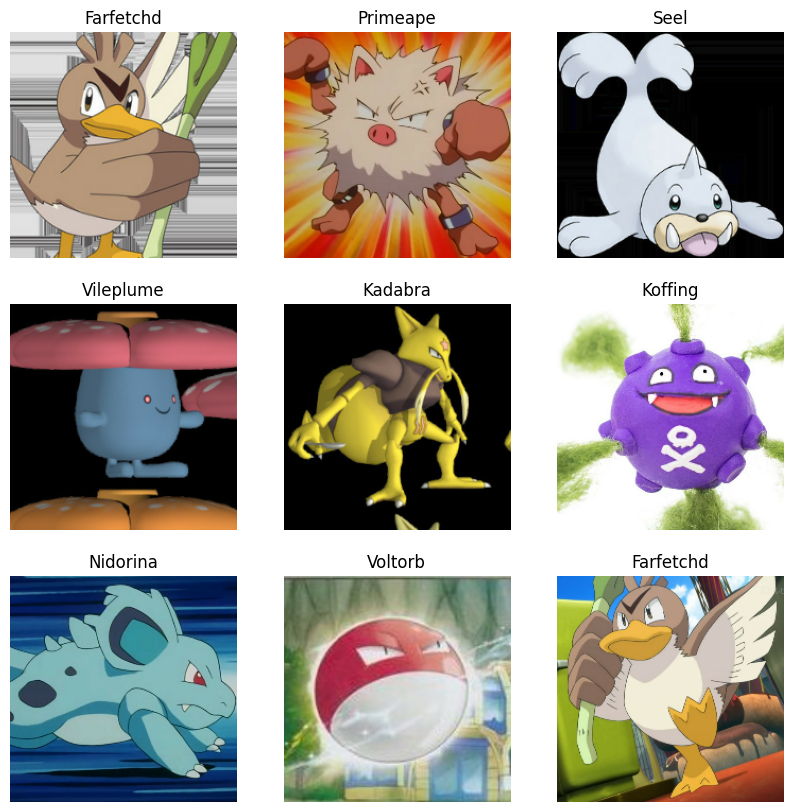

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [6]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [7]:

normalization_layer = layers.Rescaling(1./255)

In [8]:
data_augmentation = Sequential(
    [
        layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
        layers.RandomFlip("vertical", input_shape=(img_height, img_width, 3)),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
        layers.RandomContrast(0.1), 
        layers.RandomBrightness(0.1),  
    ]
)

In [9]:
num_classes = len(class_names1)

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.BatchNormalization(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.BatchNormalization(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(1024, activation='relu'),
  layers.Dropout(0.25),
  layers.Dense(512, activation='relu'),
  layers.Dense(num_classes)
])

In [16]:
model2 = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  base_model,
  layers.GlobalAveragePooling2D(),
  layers.Dense(num_classes)
])

In [133]:
model2 =  tf.keras.models.load_model("modelv4.h5")

In [17]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 214, 214, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 214, 214, 3)       0         
                                                                 
 densenet201 (Functional)    (None, 6, 6, 1920)        18321984  
                                                                 
 global_average_pooling2d (G  (None, 1920)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_3 (Dense)             (None, 152)               291992    
                                                                 
Total params: 18,613,976
Trainable params: 1,437,976
Non-trainable params: 17,176,000
__________________________________

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [137]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_9 (Sequential)   (None, 214, 214, 3)       0         
                                                                 
 rescaling_9 (Rescaling)     (None, 214, 214, 3)       0         
                                                                 
 conv2d_27 (Conv2D)          (None, 214, 214, 16)      448       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 107, 107, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 107, 107, 32)      4640      
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 53, 53, 32)       0         
 g2D)                                                

### <i><b>Model Training</i></b>

In [19]:
epochs=10
history = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
345/345 [==============================] - 434s 1s/step - loss: 2.8245 - accuracy: 0.4190 - val_loss: 1.0073 - val_accuracy: 0.7362
Epoch 2/10
345/345 [==============================] - 437s 1s/step - loss: 0.7800 - accuracy: 0.8324 - val_loss: 0.6421 - val_accuracy: 0.8321
Epoch 3/10
345/345 [==============================] - 444s 1s/step - loss: 0.3831 - accuracy: 0.9195 - val_loss: 0.5708 - val_accuracy: 0.8438
Epoch 4/10
345/345 [==============================] - 416s 1s/step - loss: 0.2334 - accuracy: 0.9497 - val_loss: 0.5173 - val_accuracy: 0.8605
Epoch 5/10
345/345 [==============================] - 412s 1s/step - loss: 0.1479 - accuracy: 0.9709 - val_loss: 0.4854 - val_accuracy: 0.8685
Epoch 6/10
345/345 [==============================] - 413s 1s/step - l

So we have 152 Pokémon  (Nidoran Female and Nidoran Male are consired as 2 differents species because they are really different).

We have now stored all the images in RGB format. Each image has a size of 214x214, and each pixel is described by a tuple of 3 integers, with values ranging between 0 and 255

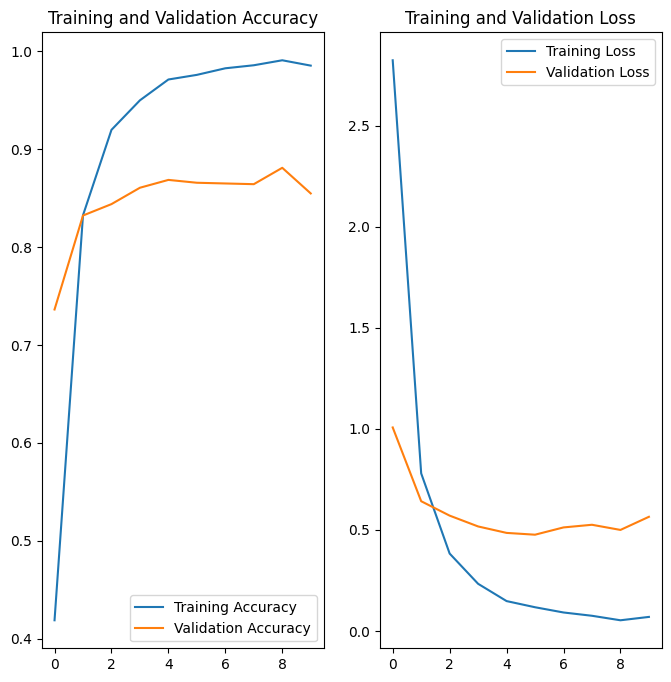

In [22]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [26]:

img = tf.keras.utils.load_img(
    "Pikachu.jpg", target_size=(img_height, img_width)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
predictions = model2.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names1[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 125ms/step
This image most likely belongs to Pikachu with a 78.37 percent confidence.


In [27]:
model2.evaluate(val_ds)

86/86 [==============================] - 75s 869ms/step - loss: 0.5650 - accuracy: 0.8547


[0.5650262832641602, 0.854651153087616]

In [28]:
model2.save("modelv5.h5")

In [24]:
label_dict1 = {}
for index, class_names in enumerate(class_names):
    label_dict1[index] = class_names

In [92]:
import pandas as pd
df = pd.DataFrame({"Pokémon":class_names1,"Score":score*100})

In [93]:
df.sort_values(["Score"],ascending=False,inplace= True)

In [94]:
df["Score"] = round(df["Score"],4)

In [95]:
df.head(15)

,Pokémon,Score
3,Alolan Sandslash,31.083799
6,Articuno,18.328899
107,Poliwhirl,12.126400
69,Lapras,6.525000
108,Poliwrath,4.667000
21,Dewgong,4.609300
138,Venomoth,4.215300
83,Mewtwo,3.578400
19,Cloyster,3.405200
106,Poliwag,3.374100


In [150]:
np.argmax(score)

86

In [91]:
sorted_indices = sorted(range(len(score)), key=lambda i: score[i])

In [94]:
import pandas as pd

In [144]:
label_dict1

{0: 'Abra',
 1: 'Aerodactyl',
 2: 'Alakazam',
 3: 'Alolan Sandslash',
 4: 'Arbok',
 5: 'Arcanine',
 6: 'Articuno',
 7: 'Beedrill',
 8: 'Bellsprout',
 9: 'Blastoise',
 10: 'Bulbasaur',
 11: 'Butterfree',
 12: 'Caterpie',
 13: 'Chansey',
 14: 'Charizard',
 15: 'Charmander',
 16: 'Charmeleon',
 17: 'Clefable',
 18: 'Clefairy',
 19: 'Cloyster',
 20: 'Cubone',
 21: 'Dewgong',
 22: 'Diglett',
 23: 'Ditto',
 24: 'Dodrio',
 25: 'Doduo',
 26: 'Dragonair',
 27: 'Dragonite',
 28: 'Dratini',
 29: 'Drowzee',
 30: 'Dugtrio',
 31: 'Eevee',
 32: 'Ekans',
 33: 'Electabuzz',
 34: 'Electrode',
 35: 'Exeggcute',
 36: 'Exeggutor',
 37: 'Farfetchd',
 38: 'Fearow',
 39: 'Flareon',
 40: 'Gastly',
 41: 'Gengar',
 42: 'Geodude',
 43: 'Gloom',
 44: 'Golbat',
 45: 'Goldeen',
 46: 'Golduck',
 47: 'Golem',
 48: 'Graveler',
 49: 'Grimer',
 50: 'Growlithe',
 51: 'Gyarados',
 52: 'Haunter',
 53: 'Hitmonchan',
 54: 'Hitmonlee',
 55: 'Horsea',
 56: 'Hypno',
 57: 'Ivysaur',
 58: 'Jigglypuff',
 59: 'Jolteon',
 60: 'Jynx',

In [151]:
sorted_indices

[2,
 27,
 112,
 104,
 132,
 33,
 29,
 63,
 114,
 59,
 150,
 14,
 75,
 56,
 113,
 120,
 80,
 130,
 0,
 7,
 50,
 137,
 3,
 64,
 15,
 61,
 98,
 147,
 99,
 122,
 84,
 31,
 119,
 144,
 93,
 109,
 55,
 39,
 115,
 5,
 74,
 6,
 57,
 101,
 81,
 16,
 66,
 108,
 9,
 46,
 88,
 145,
 134,
 51,
 95,
 37,
 8,
 94,
 131,
 69,
 79,
 129,
 96,
 38,
 133,
 121,
 103,
 135,
 100,
 22,
 65,
 12,
 141,
 107,
 111,
 24,
 43,
 73,
 36,
 17,
 124,
 26,
 62,
 30,
 10,
 136,
 23,
 76,
 71,
 77,
 128,
 91,
 70,
 68,
 149,
 25,
 142,
 102,
 28,
 78,
 106,
 21,
 45,
 48,
 105,
 110,
 151,
 42,
 54,
 118,
 41,
 140,
 146,
 20,
 125,
 72,
 143,
 123,
 89,
 127,
 11,
 13,
 18,
 47,
 60,
 85,
 4,
 67,
 139,
 44,
 126,
 87,
 34,
 53,
 117,
 35,
 32,
 82,
 58,
 49,
 40,
 19,
 116,
 148,
 1,
 97,
 138,
 92,
 83,
 52,
 90,
 86]

In [145]:
df = pd.DataFrame({"Guess":sorted_indices})

In [146]:
df["Guess2"] = df["Guess"].replace(label_dict1)

In [148]:
df.tail(10)

,Guess,Guess2
142,116,Rattata
143,148,Weezing
144,1,Aerodactyl
145,97,Onix
146,138,Venomoth
147,92,Nidorino
148,83,Mewtwo
149,52,Haunter
150,90,NidoranM
151,86,Muk


In [59]:
from scipy.stats import rankdata

In [63]:
rangs = rankdata(score).astype(int)

In [96]:
model.save('modelv4.h5')

In [44]:
predictions[0][82]

0.12572967

In [15]:
from tensorflow.keras.applications import DenseNet201

img_size = 214
base_model = DenseNet201(include_top = False,
                         weights = 'imagenet',
                         input_shape = (img_size,img_size,3))

for layer in base_model.layers[:675]:
    layer.trainable = False

for layer in base_model.layers[675:]:
    layer.trainable = True

74836368/74836368 [==============================] - 3s 0us/step
